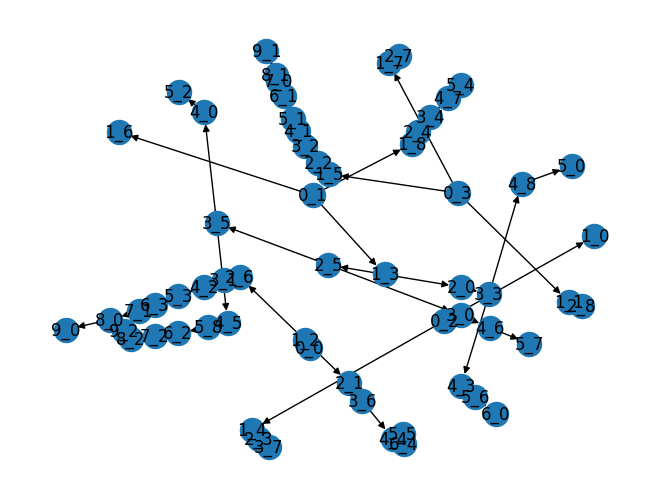

In [43]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig


def find_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def load_centroids(times):
	centroid_list=[]
	for i in range(times):
		time=i*tick
		centroids=np.loadtxt(results_folder+f"centroids_{distribution}_{time}.csv",delimiter=',')
		centroid_list.append(centroids)

	return centroid_list


def find_ancestor(centroid,prev_centroids):
	distances=[]
	for ancestor in prev_centroids:
		distance=find_distance(centroid,ancestor)
		distances.append(distance)

	return np.argmin(distances),(1/(np.min(distances)+0.1))

def get_subgraphs(G):
	subgraphs = []
	for c in nx.connected_components(G):
		subgraph = G.subgraph(c)
		subgraphs.append(subgraph)
	return subgraphs

def node_list(subgraph):
	nodes=[]
	for node in subgraph.nodes():
		nodes.append(node)
	return sorted(nodes)

def split_list_based_on_first_letter(lst):
    dict_letters = {}
    for word in lst:
        if word[0] not in dict_letters:
            dict_letters[word[0]] = [word]
        else:
            dict_letters[word[0]].append(word)
    return list(dict_letters.values())
	
Graph=nx.DiGraph()


config = pd.read_csv('config.csv')
TMAX=config['TMAX'][0]
tick=config['data_tick'][0]
distribution=str(config['food_dis'][0])
times=int(TMAX/tick)
# times=4
results_folder='Clustering_results/'



centroid_list=load_centroids(times)
original_centers=centroid_list[0]
prev_centroids=original_centers



pos = {}

for time in range(times):
	centroids=centroid_list[time]
	ii=0
	for center in centroids:
		node=f"{time}_{ii}"
		Graph.add_node(node)
		pos[node] = (time, ii)
		if time>0:
			ancestor_index,strenght=find_ancestor(center,prev_centroids)
			Graph.add_edge(f"{time-1}_{ancestor_index}",node, weight=strenght)
		ii+=1

	prev_centroids=centroids
		
nx.draw(Graph, with_labels=True)



4


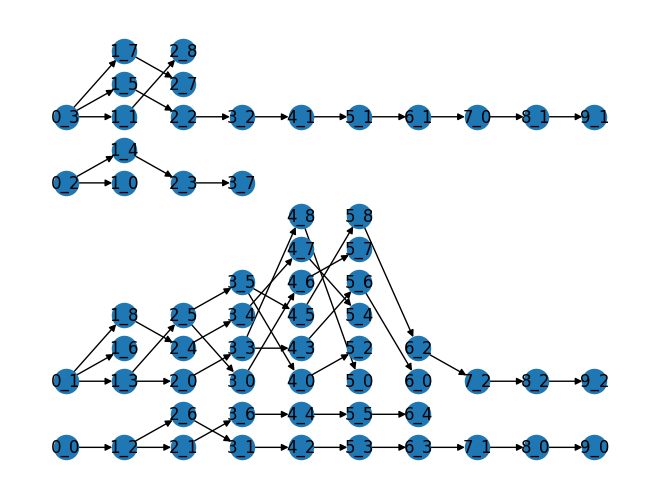

In [57]:
Graph_undirected=Graph.to_undirected()
subgraphs = get_subgraphs(Graph_undirected)
print(len(subgraphs))
starting_height=0

for subgraph in subgraphs:
	
	nodes=node_list(subgraph)
	
	nodes_time_dependent=split_list_based_on_first_letter(nodes)
	

	for time_step in nodes_time_dependent:
		node_number=0
		for node in time_step:
			pos[node]=(pos[node][0],starting_height+node_number)

			node_number+=1

	lengths = [len(sublist) for sublist in nodes_time_dependent]


	
	subgraph_height=max(lengths)
	starting_height+=subgraph_height

pos_copy=pos.copy()
nx.draw(Graph,pos=pos,with_labels=True)
plt.show()

4
0
1
2
3


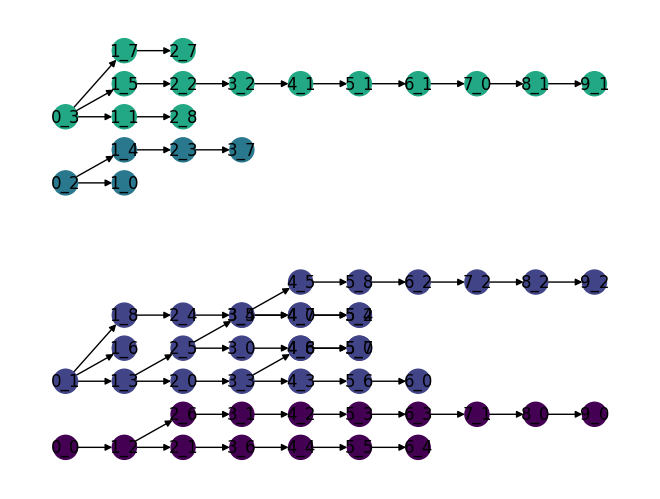

In [59]:
num_colors = 6

# Create a color map
color_map = plt.get_cmap('viridis', num_colors)

# Generate a list of colors
colors = [color_map(i) for i in range(num_colors)]
Graph_undirected=Graph.to_undirected()
subgraphs = get_subgraphs(Graph_undirected)
print(len(subgraphs))
for subgraph in subgraphs:
	index=subgraphs.index(subgraph)
	print(index)
	color=colors[index]
	nodes=node_list(subgraph)
	nodes_time_dependent=split_list_based_on_first_letter(nodes)

	for nodes in nodes_time_dependent:
		# nodes=nodes_time_dependent[time]
		
		for node in nodes:
			# print(pos[node])
			Graph.nodes[node]['color']=color
			parent_height=pos[node][1]
			outgoing_edges=list(Graph.out_edges(node))
			children_nodes=[sublist[-1] for sublist in outgoing_edges]
			# print(node,children_nodes)

			if len(children_nodes)>0:
				child_height=parent_height
				for child in children_nodes:
					pos[child]=(pos[child][0],child_height)
					child_height+=1
			


		

nx.draw(Graph,pos=pos,with_labels=True,node_color=[Graph.nodes[node]['color'] for node in Graph.nodes()])



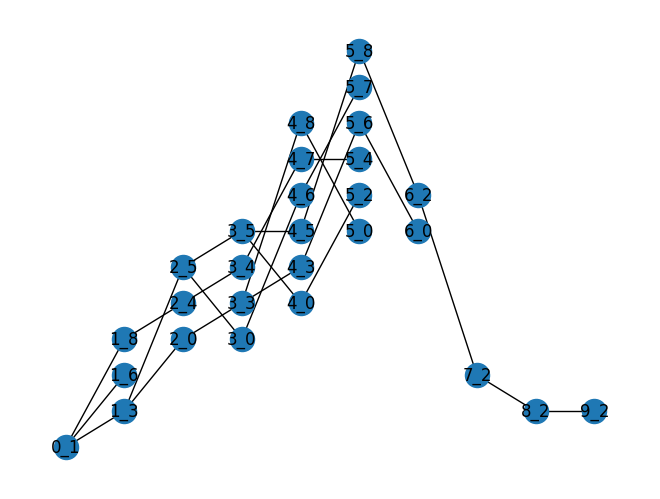

In [70]:
Graph_undirected=Graph.to_undirected()
subgraphs = get_subgraphs(Graph_undirected)

graph1=subgraphs[1]
pos1={}

nodes=node_list(graph1)
nodes_time_dependent=split_list_based_on_first_letter(nodes)

time=0
prev_height=0
for nodes in nodes_time_dependent:
	height=0
	
	for node in nodes:
		outgoing_edges=list(Graph.out_edges(node))
		children_nodes=[sublist[-1] for sublist in outgoing_edges]
		

nx.draw(graph1,pos=pos1,with_labels=True)

